 **An epoch refers to one complete pass of the entire training dataset through the learning algorithm.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Mean squared error from residual
def mse_from_e(residual):
  """
  """
  # Square the residual vector element-wise
  squared_residual = residual ** 2
  # Sum up the squared residuals
  sum_squared_residual = np.sum(squared_residual)
  # Divide by the number of samples
  mse = sum_squared_residual / len(residual)

  return mse
# Mean Squared Error of X.w - y
def mean_squared_error(X, y, w):
  """b
  """
  # Compute the predicted values by multiplying X and w
  y_pred = np.dot(X, w)
  # Compute the residual vector by subtracting y from y_pred
  residual = y_pred - y
  # Call the mse_from_e function to calculate the mean squared error from the residual
  mse = mse_from_e(residual)

  return mse

# Asserting the mean squared error calculation function

assert mse_from_e(np.array([1, 2, 3]))== 4.666666666666667

In [13]:
# Generate a sawtooth weight vector
def genu(d, m):
    u = np.arange(d) * (2 * (np.arange(d) % 2) - 1)
    u = m * u / np.sqrt(np.dot(u, u))
    return u

# Generate random data
def genx(n, d):
    X = np.random.randint(0, 2, (n, d))
    X[:,int(d/2)] = 1
    return X

# Generate targets and add noise
def gent(X, u, noise):
    n = X.shape[0]
    y = np.dot(X, u).reshape(n, 1)
    y += noise * np.var(y) * np.random.randn(n, 1)
    return y

# Generate data, weights, and targets
def gimme_data_regres(n, d, noise=0.1):
    u = genu(d, 1.0)
    X = genx(n, d)
    y = gent(X, u, noise)
    mse_gen = mean_squared_error(X, y, u)
    print('Generator Loss={0:8.5f}\n'.format(mse_gen))
    return X, u, y

In [4]:
use_notebook = False

In [5]:
# Plot loss as a function of epoch
def loss_plotter(vlist, fname):
    vr = vlist[0]
    vn = vlist[1]
    if not use_notebook:
      plt.figure(fname)
    plt.plot(range(1, 1+len(vr)), vr,
           range(1, 1+len(vn)), vn,
           linewidth=2, linestyle='-', marker='o')
    plt.legend(('rep', 'nor'))
    plt.grid()
    xt = np.arange(1, 1 + max(len(vr), len(vn)))
    _ = plt.xticks(xt)
    _ = plt.xlabel('Epoch', fontsize=14)
    _ = plt.ylabel(fname, fontsize=14)
    if not use_notebook:
        plt.show(block=False)
    return

# Scatter plot of predicted vs. observed targets
def loss_scatter(X, y, w, fname):
    if not use_notebook:
        plt.figure(fname)
    plt.scatter(y, X.dot(w), edgecolors=(0,0,0))
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.grid()
    plt.xlabel('$y$', fontsize=14)
    plt.ylabel('$\hat{y}$', fontsize=14)
    if not use_notebook:
        plt.show(block=False)

In [31]:
# sample new index (w/ or w/o replacement)
def sample_new_index(d, replace=1):
    if replace:
        ind = np.random.randint(0, d)
    else:
        if 'prm' not in sample_new_index.__dict__:
            sample_new_index.prm = np.random.permutation(d)
            sample_new_index.head = 0
            print("New permutation:", sample_new_index.prm)
            print("Head:", sample_new_index.head)
        ind = sample_new_index.prm[sample_new_index.head]
        sample_new_index.head += 1
        if sample_new_index.head == d:
            sample_new_index.head = 0
            del sample_new_index.prm
            print("Permutation reset!")
    return ind
# Asserting the sample_new_index function
np.random.seed(42)  # Setting seed for reproducibility
assert sample_new_index(10, replace=1) == 6  # Example assertion

Delta_wj=et*xj/xjt*xj

In [7]:
# calculate the change to w[j] wrt current margins z
# xjs is the squared norm of the jth column of X, a.k.a. ||xj||^2
def delta_wj(e, xj, xjs):
    """
    Calculate the change to w[j] with respect to the current margins z.

    Parameters:
    e: The residual vector of shape (n, 1)
    xj: The jth column of X as a column vector of shape (n, 1)
    xjs: The squared norm of xj, a scalar

    Returns:
    delta_wj: The change to w[j], a scalar
    """
    # Ensure that e and xj are column vectors
    e = e.reshape(-1, 1)
    xj = xj.reshape(-1, 1)

    # Compute the numerator by taking the dot product of e and xj
    numerator = np.dot(e.T, xj)[0, 0]  # Ensure the result is a scalar
    # Compute the denominator by using xjs, which is the squared norm of xj
    denominator = xjs
    # Compute the change to w[j] by dividing the numerator by the denominator
    delta_wj = numerator / denominator
    return delta_wj

# Return new values for w[j] and residual
def update(wj, e, xj, xjs):
  """
  """
  ## ACT6
  # Call the delta_wj function to calculate the change to w[j]
  dwj = delta_wj(e, xj, xjs)
  # Update the value of w[j] by adding the change to w[j] to the current w[j]
  wj_new = wj + dwj
  # Update the value of residual by subtracting the product of the change to w[j] and xj from the current residual
  e_new = e - dwj * xj
  return wj_new, e_new


In [33]:
# Initialize all variables using the zero vector for w
# (Initialize w as the zero vector)
# You should return w, xjs, residual
def initialize(X, y):
  """
  """
  ## ACT7
  # Get the number of features from the shape of X
  n_features = X.shape[1]
  # Initialize w as the zero vector with the same length as the number of features
  w = np.zeros(n_features)
  # Calculate the squared norm of each column of X by squaring X element-wise and summing along the rows
  xjs = np.sum(X ** 2, axis=0)
  # Initialize the residual vector as the target vector y
  residual = y

  return w,xjs,residual

# Asserting the initialize function
X_test = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Example X matrix
y_test = np.array([10, 11, 12])  # Example y vector
w_init, xjs_init, residual_init = initialize(X_test, y_test)

# Asserting w is initialized as a zero vector
assert np.all(w_init == 0)

# Asserting xjs initialization
expected_xjs = np.array([66, 93, 126])
assert np.all(xjs_init == expected_xjs)

# Asserting residual is initialized as y
assert np.all(residual_init == y_test)


In [34]:
# Check whether termination condition is met
def mse_check(mse_p, mse_c, eps):
  """
  """
  ## ACT8
  # Compute the absolute difference between mse_p and mse_c
  diff = abs(mse_p - mse_c)
  # Compare the difference with eps
  if diff <= eps:
    return True
  else:
    return False

# Asserting the mse_check function
assert mse_check(10, 9.999, 0.001) == True  # Example assertion
assert mse_check(5, 3, 0.001) == False  # Example assertion

In [10]:
# Linear regression using coordinate decent
def linear_regression_cd(X, y, epochs=100, eps=0.001, replace=1):
  w, xjs, residual = initialize(X, y)
  mse_cd = [mse_from_e(residual)]
  n, d = X.shape
  for e in range(d * epochs):
    j = sample_new_index(d, replace)
    xj = X[:,j].reshape(n, 1)
    w[j], residual = update(w[j], residual, xj, xjs[j])
    if (e + 1) % d == 0:
      mse_cd.append(mse_from_e(residual))
      print('Epoch: {0:2d}  MSE: {1:5.3f}'.format(int((e+1)/d), mse_cd[-1]))
      if mse_check(mse_cd[-2], mse_cd[-1], eps):
        break
  return w, mse_cd

Generator Loss=559.01124

Epoch:  1  MSE: 0.194
Epoch:  2  MSE: 0.130
Epoch:  3  MSE: 0.084
Epoch:  4  MSE: 0.078
Epoch:  5  MSE: 0.074
Epoch:  6  MSE: 0.063
Epoch:  7  MSE: 0.059
Epoch:  8  MSE: 0.058
Epoch:  9  MSE: 0.058
Epoch: 10  MSE: 0.057
Epoch: 11  MSE: 0.057
Epoch: 12  MSE: 0.057
Epoch: 13  MSE: 0.057
Epoch: 14  MSE: 0.057
Epoch: 15  MSE: 0.057
Epoch: 16  MSE: 0.057
Epoch:  1  MSE: 0.124
Epoch:  2  MSE: 0.069
Epoch:  3  MSE: 0.060
Epoch:  4  MSE: 0.059
Epoch:  5  MSE: 0.058
Epoch:  6  MSE: 0.058
Epoch:  7  MSE: 0.058
Epoch:  8  MSE: 0.058
Epoch:  9  MSE: 0.057
Epoch: 10  MSE: 0.057
Epoch: 11  MSE: 0.057
Epoch: 12  MSE: 0.057


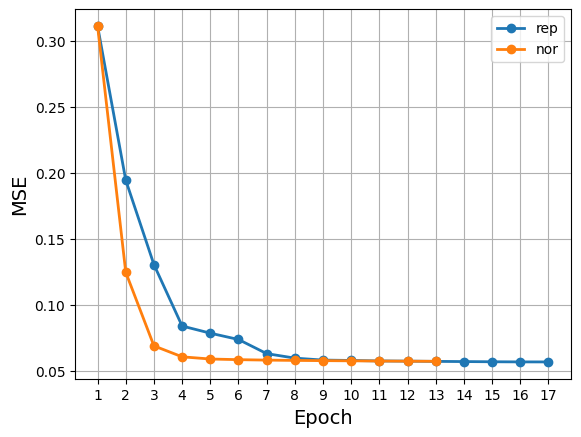

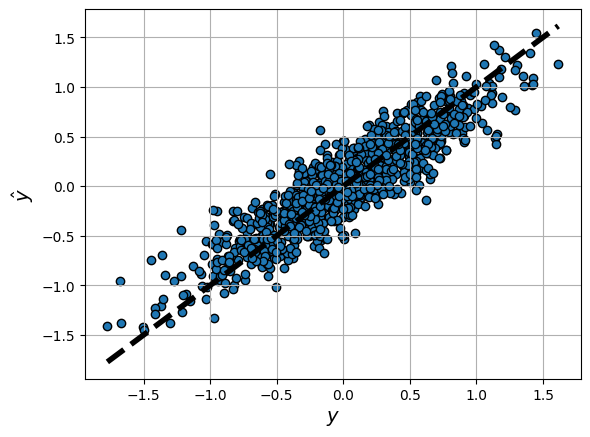

In [11]:
# ---------------- Main for linear regression using Coordinate Descent --------------
np.random.seed(17)
n, d, noise = 1000, 20, 1.0
myeps = 1e-4

[X, u, y] = gimme_data_regres(n, d, noise)

mse_list = []
[wr, mse_r] = linear_regression_cd(X, y, eps=myeps)
mse_list.append(mse_r)
[wn, mse_n] = linear_regression_cd(X, y, eps=myeps, replace=0)
mse_list.append(mse_n)

if not use_notebook:
  plt.close('all')
loss_plotter(mse_list, 'MSE')
loss_scatter(X, y, wn, 'True vs. Predicted Outcome')